In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pylab import *
from IPython.display import display

# 加载数据
# 数据：抽样一小时（2017031217）的行为数据，关联当天（20170312）所有阅读时长上报日志
# 说明：带nonull的文件名表示只保留有上报阅读时长的日志
file_name = 'data/tmp_hindi_app_iflow_reco_pv_rd_2017031217' # 'data/tmp_hindi_app_iflow_reco_pv_rd_2017030117'
columns = '''tm_pv,reco_id,ds,item_id,app,set_lang,cate,item_type,tm_rd,tm_vl,is_rf,clk,pub_tm,upd_tm,len,tm_clk'''.split(",")
d1 = pd.read_csv(file_name, sep='\1', header=None, names=columns, dtype={'cate':str})
d1['cate_org'] = d1['cate']
d1['cate'] = d1['cate'].str[0:3]

# 分类CTR
d1_ctr = d1[['cate','clk']].groupby('cate').mean()

In [134]:
# 数据描述
display(d1.columns)
display(d1.head(3))
display(d1.describe())

Index([u'tm_pv', u'reco_id', u'ds', u'item_id', u'app', u'set_lang', u'cate',
       u'item_type', u'tm_rd', u'tm_vl', u'is_rf', u'clk', u'pub_tm',
       u'upd_tm', u'len', u'tm_clk', u'cate_org'],
      dtype='object')

,tm_pv,reco_id,ds,item_id,app,set_lang,cate,item_type,tm_rd,tm_vl,is_rf,clk,pub_tm,upd_tm,len,tm_clk,cate_org
0,1489312596,30835857-a1fd-4bf9-a9f4-8a5e33281c30,WKjkrQteOkIDAK0mKrpIcHWg,1005364371572074,app_iflow,hindi,025,201,\N,\N,\N,0,1489151046,1489288318,423,\N,025
1,1489309224,5cfcc594-37fe-4b0e-aea1-8913a0e96279,WLd6Q+oaTtIDAB/l4kQhvpeI,1005364371572074,app_iflow,hindi,025,201,\N,\N,\N,0,1489151046,1489288318,423,\N,025
2,1489312545,b93617d0-ad31-4ea2-8d59-fae97700452a,WMPJH/0KB3sDAFCUcq5d2AvG,1005364371572074,app_iflow,hindi,025,201,1489333815,17970,0,1,1489151046,1489288318,423,1489312783,025


,tm_pv,item_id,item_type,clk,pub_tm,upd_tm,len
count,1.035361e+06,1.035361e+06,1.035361e+06,1.035361e+06,1.035361e+06,1.035361e+06,1.035361e+06
mean,1.489311e+09,2.471427e+15,2.510462e+01,7.297938e-02,1.488819e+09,1.489203e+09,2.595212e+03
std,1.039510e+03,1.474593e+15,6.687796e+01,2.601028e-01,3.984865e+06,2.833043e+05,6.481470e+03
min,1.489309e+09,1.412909e+11,0.000000e+00,0.000000e+00,1.402923e+09,1.485410e+09,0.000000e+00
25%,1.489310e+09,1.205702e+15,0.000000e+00,0.000000e+00,1.489191e+09,1.489213e+09,1.008000e+03
50%,1.489311e+09,2.467040e+15,0.000000e+00,0.000000e+00,1.489249e+09,1.489286e+09,1.601000e+03
75%,1.489312e+09,3.533353e+15,0.000000e+00,0.000000e+00,1.489295e+09,1.489304e+09,2.325000e+03
max,1.489313e+09,6.666664e+15,2.220000e+02,1.000000e+00,1.489404e+09,1.489405e+09,1.570080e+05


In [16]:
# 加载数据
# 数据：抽样一小时（2017031217）的行为数据，关联当天（20170312）所有阅读时长上报日志
# 说明：带nonull的文件名表示只保留有上报阅读时长的日志
file_name = 'data/tmp_hindi_app_iflow_reco_pv_rd_nonull_2017031217' # 'data/tmp_hindi_app_iflow_reco_pv_rd_2017030117'
columns = '''tm_pv,reco_id,ds,item_id,app,set_lang,cate,item_type,tm_rd,tm_vl,is_rf,clk,pub_tm,upd_tm,len,tm_clk'''.split(",")
data = pd.read_csv(file_name, sep='\1', header=None, names=columns, dtype={'cate':str})
data['cate_org'] = data['cate']
data['cate'] = data['cate'].str[0:3]

print("raw hape: ", data.shape)
print(data.dtypes)

# 数据case
data.head(2)

('raw hape: ', (737131, 17))
tm_pv         int64
reco_id      object
ds           object
item_id       int64
app          object
set_lang     object
cate         object
item_type     int64
tm_rd         int64
tm_vl         int64
is_rf         int64
clk           int64
pub_tm        int64
upd_tm        int64
len           int64
tm_clk       object
cate_org     object
dtype: object


,tm_pv,reco_id,ds,item_id,app,set_lang,cate,item_type,tm_rd,tm_vl,is_rf,clk,pub_tm,upd_tm,len,tm_clk,cate_org
0,1489310393,991f1c22-8388-432c-b08e-bb2c3e6076c2,WBuF/SWGzFMDAG77SSESoUBa,1034295098541467,app_iflow,hindi,005,0,1489320370,2786,0,1,1489125478,1489126124,1119,1489310398,005
1,1489310026,d9ae2e96-a07e-477c-aa6f-24a9ad3f0491,V944P0yj9ucDAIKN+O3BAo9g,1057449418870022,app_iflow,hindi,004,0,1489315752,1872,0,1,1489081325,1489110985,846,1489310030,004001


In [183]:
# 数据描述
display(data[['tm_rd','tm_vl','is_rf','len']].describe())

# 时长分位点
display(data['tm_vl'].quantile([0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.97,0.99]))

,tm_rd,tm_vl,is_rf,len
count,7.371310e+05,7.371310e+05,737131.000000,737131.000000
mean,1.489317e+09,2.156208e+06,0.385459,2707.206391
std,6.864433e+03,1.729205e+09,0.486704,5959.610629
min,1.489309e+09,-1.978343e+07,0.000000,0.000000
25%,1.489312e+09,1.101900e+04,0.000000,1019.000000
50%,1.489314e+09,3.047800e+04,0.000000,1641.000000
75%,1.489321e+09,6.683000e+04,1.000000,2349.000000
max,1.489334e+09,1.483016e+12,1.000000,157008.000000


0.75     66830.0
0.80     78741.0
0.85     94283.0
0.90    116640.0
0.95    157696.0
0.97    193154.5
0.99    286076.4
Name: tm_vl, dtype: float64

In [112]:
# --------- 数据清洗 ----------
# 数据清洗，空值过滤，只考虑有点击和时长上报的样本
# dc = data[(data['tm_vl'].str.contains('\\N')==False)&(data['tm_clk'].str.contains('\\N')==False)]
dc = data[(data['tm_clk'].str.contains('\\N')==False)]
print("null filtered shape: ", dc.shape)

# 异常值过滤：
# 1) 阅读时长：>0 && <0.95分位数
# 2) 内容长度：>0 && <0.95分位数
def abnorm_filter(df, column, th=0.95):
    lower = 0
    upper = df[column].quantile(th)
    return df[(df[column]<upper) & (df[column]>lower)]

dc['tm_vl'] = dc['tm_vl'].apply(pd.to_numeric) # 阅读时长
dc = abnorm_filter(dc, 'tm_vl', 0.95)
dc = abnorm_filter(dc, 'len', 0.95)
print("abnormal value filtered shape: ", dc.shape)

dc['tm_rd'] = dc['tm_rd'].astype('float')
dc['is_rf'] = dc['is_rf'].astype('float')
dc['tm_clk'] = dc['tm_clk'].astype('float')

dc['td_clk'] = dc['tm_clk']-dc['tm_pv']
dc['td_rd'] = dc['tm_rd']-dc['tm_pv']
dc['tm_vl_w'] = dc['tm_vl']/dc['len']

('null filtered shape: ', (713908, 17))


/home/datamining/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('abnormal value filtered shape: ', (629515, 17))


In [180]:
# 数据描述
display(dc[['td_rd','tm_vl','len','tm_vl_w']].describe())
display(dc['tm_vl'].quantile([0.85,0.9,0.95,0.97,0.99]))

,td_rd,tm_vl,len,tm_vl_w
count,629515.000000,629515.000000,629515.000000,629515.000000
mean,5730.425102,40361.428994,1754.696962,42.053043
std,6690.525126,36771.544141,1184.922891,139.500006
min,8.000000,1.000000,36.000000,0.000187
25%,903.000000,10862.000000,1008.000000,7.354424
50%,2204.000000,29665.000000,1607.000000,20.980237
75%,9073.000000,60465.000000,2157.000000,43.910898
max,25164.000000,158306.000000,8343.000000,4044.128205


0.85     81454.0
0.90     96466.6
0.95    118229.3
0.97    130565.0
0.99    147169.0
Name: tm_vl, dtype: float64

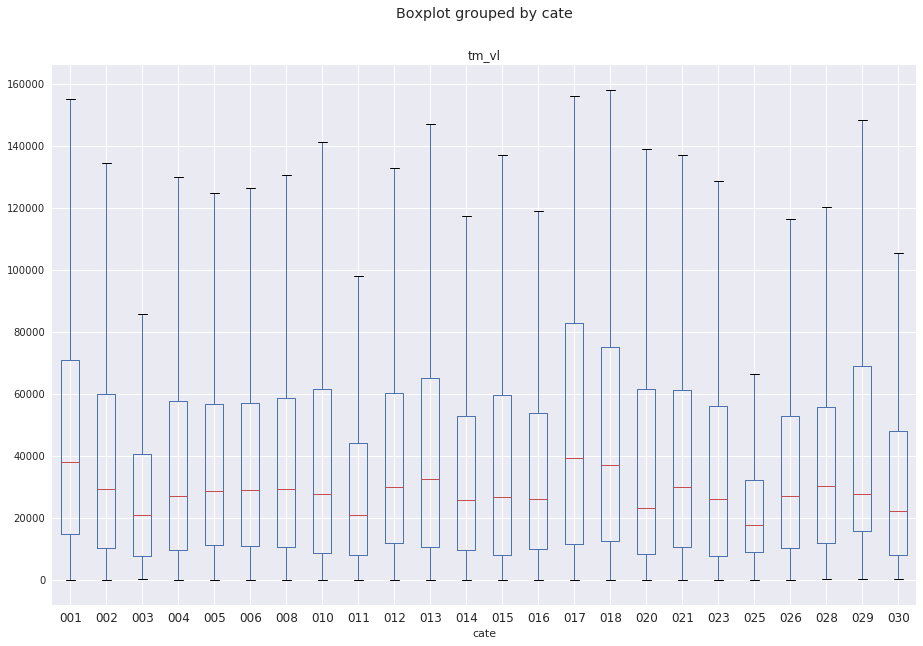

dc_cate_rd统计量：


count    595944.000000
mean      40149.261788
std       36561.630748
min           1.000000
25%       10879.000000
50%       29556.000000
75%       60117.000000
max      158306.000000
Name: tm_vl, dtype: float64

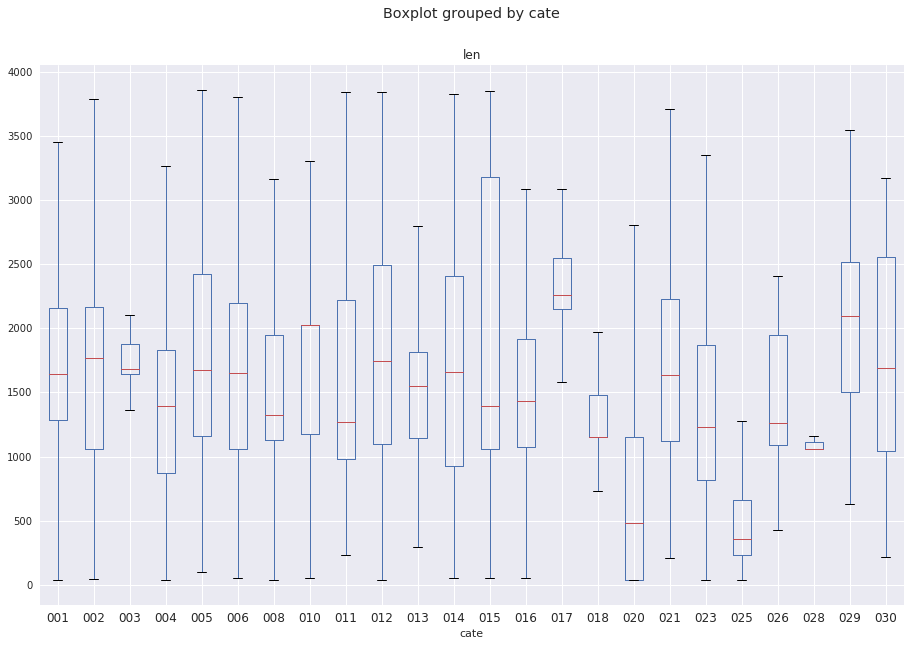

dc_cate_len统计量：


count    595944.000000
mean       1562.336079
std         773.810907
min          36.000000
25%         988.000000
50%        1548.000000
75%        2019.000000
max        3862.000000
Name: len, dtype: float64

分类阅读时长和内容长度相关性：


,tm_vl,len
tm_vl,1.000,0.496
len,0.496,1.000


全局阅读时长和内容长度相关性：


,tm_vl,len
tm_vl,1.000000,0.125482
len,0.125482,1.000000


全局阅读时长和内容长度相关性（内容长度<0.95分位数）：


,tm_vl,len
tm_vl,1.00000,0.17479
len,0.17479,1.00000


阅读时长 vs. 内容长度，宏观，按阅读时长等距分组：


,tm_vl,len
tm_vl,1.00000,0.96639
len,0.96639,1.00000


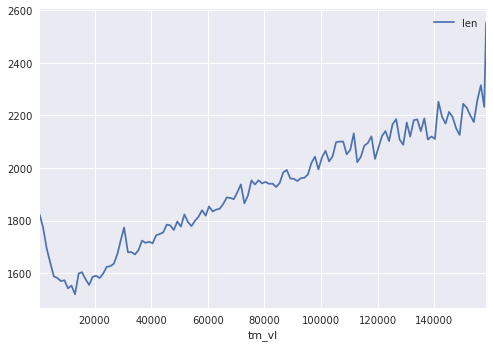

相关性 - 阅读时长 vs. 内容长度，宏观，按阅读时长等频分组：


,tm_vl,len
tm_vl,1.000000,0.878728
len,0.878728,1.000000


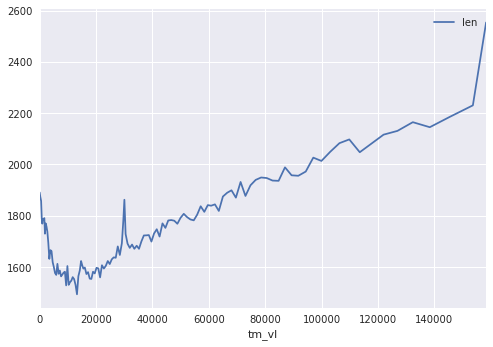

相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等距分组：


,len,tm_vl
len,1.000000,0.212852
tm_vl,0.212852,1.000000


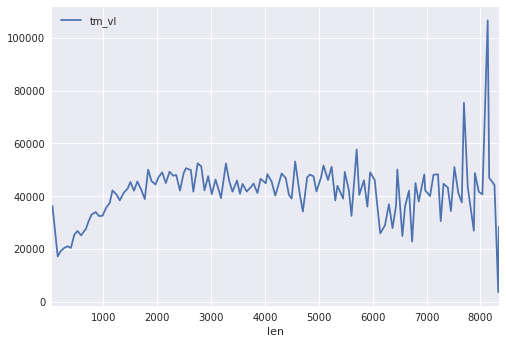

相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等频分组：


,len,tm_vl
len,1.000000,0.422973
tm_vl,0.422973,1.000000


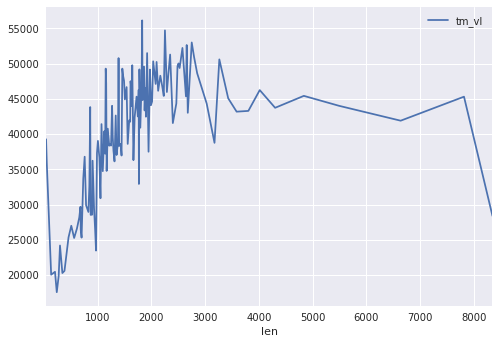

In [88]:
# ----------- 数据探索 -----------
# utils
def binary_search_range(v, lst, lower, upper):
    mid = int((lower+upper)/2)
    if abs(v-lst[mid])<1e-6:
        return [mid, min(mid+1, len(lst)-1)]
    if lower == upper:
        return [-1, -1]
    if v > lst[mid]:
        lower_nxt = int(mid+1)
        if v < lst[lower_nxt]: return [lower_nxt-1, lower_nxt]
        else: lower = lower_nxt
    if v < lst[mid]:
        upper_nxt = int(mid)
        if v > lst[upper_nxt]: return [upper_nxt, upper_nxt+1]
        else: upper = upper_nxt
    return binary_search_range(v, lst, lower, upper)

def div_bucket(x,dp):
    return [binary_search_range(v, dp, 0, len(dp)-1)[0] for v in x]

def analy_group_corr(df, c1, c2, bucket_col='c1', bucket_type='dist', bucket_num=32, corr='pearson'):
    if bucket_col != "c1":
        tmp = c1
        c1 = c2
        c2 = tmp
    ps = np.linspace(start=0, stop=1, num=bucket_num) 
    ef = dc[c1].quantile(ps).values # 等频
    ed = np.linspace(start=dc[c1].min(), stop=dc[c1].max(), num=bucket_num) # 等距
    dp = ed if bucket_type=='dist' else ef
    dc_grp = dc[[c1,c2]].groupby(div_bucket(dc[c1].values, dp))
    dc_mean = dc_grp.mean()
#     display(dc_mean)
    display(dc_mean.corr(corr))
    dc_mean.plot(kind='line', x=c1, y=c2)
    plt.show()

# 类目白名单
cate_dist = dc[['cate','tm_vl']][(dc['cate'].str.startswith('032')==False)].groupby('cate').count()
cate_set = set(cate_dist[cate_dist['tm_vl']>100].index)
# print cate_dist
# print cate_set

# 相关性 - 分类 vs. 阅读时长 
# plt.figure(figsize=(20, 10))
# sns.boxplot(x='cate', y='tm_vl', data=dc[dc['cate'].str.len()==3][['cate','tm_vl']])
# sns.despine(offset=10, trim=True)
dc_cate_rd_len = dc[['cate','tm_vl','len']]
dc_cate_rd_len = dc_cate_rd_len[(dc_cate_rd_len['len']<dc_cate_rd_len['len'].quantile(0.95))&dc_cate_rd_len.apply(lambda x: x['cate'] in cate_set, axis=1)]
dc_cate_rd = dc_cate_rd_len[['cate','tm_vl']]
dc_cate_rd.boxplot(column='tm_vl', by='cate', figsize=(15,10))
plt.show()

print "dc_cate_rd统计量："
display(dc_cate_rd['tm_vl'].describe())


# 相关性 - 分类 vs. 内容长度分布
# plt.figure(figsize=(20, 10))
# sns.boxplot(x='cate', y='len', data=dc[(dc['cate'].str.len()==3)&(dc['len']<dc['len'].quantile(0.95))][['cate','len']])
# sns.despine(offset=10, trim=True)
# dc[(dc['cate'].str.len()==3)&(dc['len']<dc['len'].quantile(0.95))][['cate','len']].boxplot(column='len', by='cate', figsize=(15,10))
dc_cate_len = dc_cate_rd_len[['cate','len']]
dc_cate_len.boxplot(column='len', by='cate', figsize=(15,10))
plt.show()

print "dc_cate_len统计量："
display(dc_cate_len['len'].describe())

# 相关性 - 分类分组，阅读时长和内容长度相关性
# 注：032是纯视频，没有文本内容长度，计算相关性时需要过滤掉
# 结论：呈强相关性（0.56）
dc_cate_rd_len_mean = dc_cate_rd_len.groupby('cate').mean()
# display(dc_cate_rd_len_mean.sort_values(by='tm_vl',ascending=True))
print "分类阅读时长和内容长度相关性："
display(dc_cate_rd_len_mean.corr())

# 相关性 - 分类 vs. CTR分布
# dc_cate_ctr = dc['cate','clk'].groupby('cate').agg('mean')
# dc_cate_ctr.plot('bar', x='cate', y='clk')
# plt.show()
    
# 相关性 - 阅读时长 vs. 内容长度，微观，(reco_id, item_id)分组
# display(dc[(dc['len']>0)&(dc['len']<dc['len'].quantile(0.95))][['tm_vl','len']].corr('spearman'))
# 结论：不对len过滤，弱相关（0.12）；对len按0.95分位数过滤，弱相关（0.17）
print "全局阅读时长和内容长度相关性："
display(dc[['tm_vl','len']].corr())
print "全局阅读时长和内容长度相关性（内容长度<0.95分位数）："
display(dc[['tm_vl','len']][dc['len']<dc['len'].quantile(0.95)].corr())

# 相关性 - 阅读时长 vs. 内容长度，宏观，按阅读时长等距分组
print "阅读时长 vs. 内容长度，宏观，按阅读时长等距分组："
analy_group_corr(dc, 'tm_vl', 'len', bucket_col='c1', bucket_type='dist', bucket_num=128,)

# 相关性 - 阅读时长 vs. 内容长度，宏观，按阅读时长等频分组
print "相关性 - 阅读时长 vs. 内容长度，宏观，按阅读时长等频分组："
analy_group_corr(dc, 'tm_vl', 'len', bucket_col='c1', bucket_type='freq', bucket_num=128)

# 相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等距分组
print "相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等距分组："
analy_group_corr(dc, 'tm_vl', 'len', bucket_col='c2', bucket_type='dist', bucket_num=128)

# 相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等频分组
print "相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等频分组："
analy_group_corr(dc, 'tm_vl', 'len', bucket_col='c2', bucket_type='freq', bucket_num=128)

    


相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等频分组：


,len,tm_vl
len,1.000000,0.522065
tm_vl,0.522065,1.000000


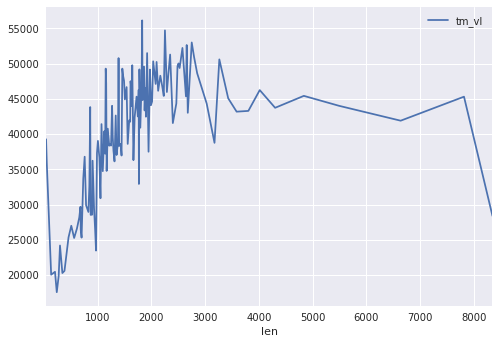

In [82]:
# utils
def binary_search_range(v, lst, lower, upper):
    mid = int((lower+upper)/2)
    if abs(v-lst[mid])<1e-6:
        return [mid, min(mid+1, len(lst)-1)]
    if lower == upper:
        return [-1, -1]
    if v > lst[mid]:
        lower_nxt = int(mid+1)
        if v < lst[lower_nxt]: return [lower_nxt-1, lower_nxt]
        else: lower = lower_nxt
    if v < lst[mid]:
        upper_nxt = int(mid)
        if v > lst[upper_nxt]: return [upper_nxt, upper_nxt+1]
        else: upper = upper_nxt
    return binary_search_range(v, lst, lower, upper)

def div_bucket(x,dp):
    return [binary_search_range(v, dp, 0, len(dp)-1)[0] for v in x]

def analy_group_corr(df, c1, c2, bucket_col='c1', bucket_type='dist', bucket_num=32, corr='pearson'):
    if bucket_col != "c1":
        tmp = c1
        c1 = c2
        c2 = tmp
    ps = np.linspace(start=0, stop=1, num=bucket_num) 
    ef = dc[c1].quantile(ps).values # 等频
    ed = np.linspace(start=dc[c1].min(), stop=dc[c1].max(), num=bucket_num) # 等距
    dp = ed if bucket_type=='dist' else ef
    dc_grp = dc[[c1,c2]].groupby(div_bucket(dc[c1].values, dp))
    dc_mean = dc_grp.mean()
#     display(dc_mean)
    display(dc_mean.corr(corr))
    dc_mean.plot(kind='line', x=c1, y=c2)
    plt.show()

# 相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等频分组
print "相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等频分组："
analy_group_corr(dc, 'tm_vl', 'len', bucket_col='c2', bucket_type='freq', bucket_num=128, corr='kendall')

In [85]:
display(dc_cate_rd['tm_vl'].describe())
display(dc_cate_len['len'].describe())

count    595944.000000
mean      40149.261788
std       36561.630748
min           1.000000
25%       10879.000000
50%       29556.000000
75%       60117.000000
max      158306.000000
Name: tm_vl, dtype: float64

count    595944.000000
mean       1562.336079
std         773.810907
min          36.000000
25%         988.000000
50%        1548.000000
75%        2019.000000
max        3862.000000
Name: len, dtype: float64

相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等距分组：


,len,tm_vl
len,1.000000,0.225335
tm_vl,0.225335,1.000000


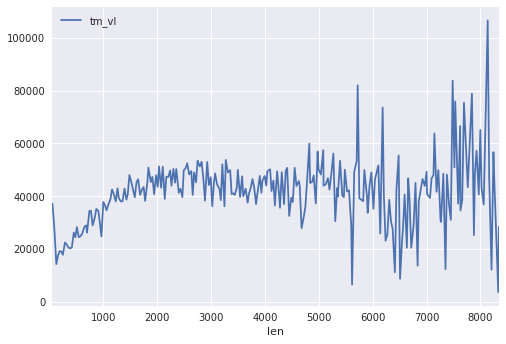

相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等频分组：


,len,tm_vl
len,1.000000,0.451853
tm_vl,0.451853,1.000000


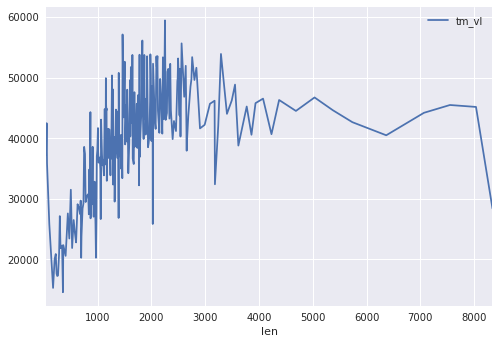

In [51]:
# 相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等距分组
print "相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等距分组："
analy_group_corr(dc, 'tm_vl', 'len', bucket_col='c2', bucket_type='dist', bucket_num=256)

# 相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等频分组
print "相关性 - 阅读时长 vs. 内容长度，宏观，按内容长度等频分组："
analy_group_corr(dc, 'tm_vl', 'len', bucket_col='c2', bucket_type='freq', bucket_num=256)

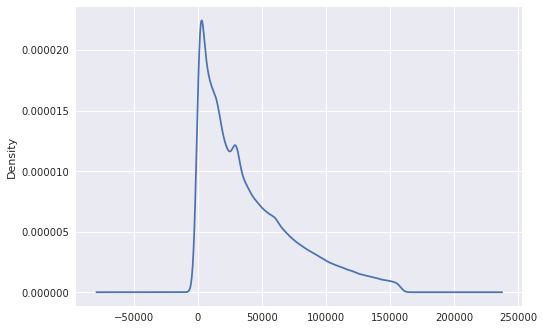

In [48]:
dc_cate_rd_len['tm_vl'].plot(kind='kde')
plt.show()

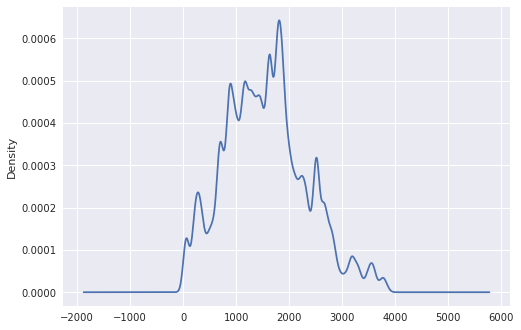

In [49]:
dc_cate_rd_len['len'].plot(kind='kde')
plt.show()

             tm_vl       ctr
cate                        
025   24674.736077  0.111251
011   30780.934683  0.032397
003   31589.954545  0.033803
030   33822.245763  0.021875
026   36439.555674  0.094079
014   36500.469503  0.044307
016   36659.584770  0.029927
023   37197.632398  0.048207
004   38468.633717  0.082736
020   38497.267442  0.039085
015   38549.938298  0.096851
006   38583.114178  0.053607
008   39166.558931  0.049166
005   39294.447522  0.061521
002   40041.004867  0.090002
010   40075.962426  0.050296
021   40854.228131  0.087914
012   40946.442964  0.068189
028   41080.036082  0.070588
013   42749.100960  0.071195
001   47010.011961  0.075452
029   47167.877049  0.008043
018   47240.929842  0.083524
017   50216.650519  0.036286


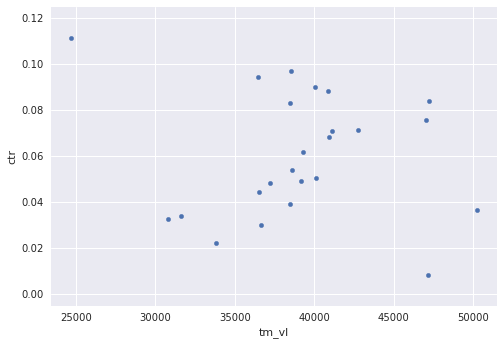

          tm_vl       ctr
tm_vl  1.000000  0.144928
ctr    0.144928  1.000000


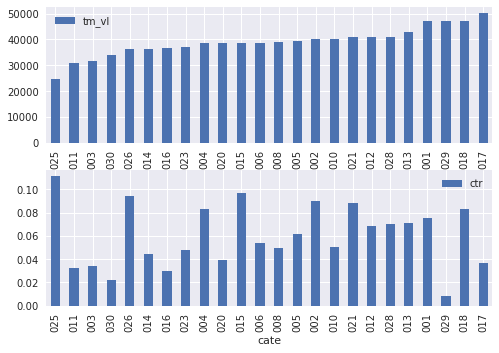

In [104]:
dc_cate_rd_mean = dc_cate_rd.groupby('cate').mean()
dc_cate_rd_ctr = dc_cate_rd_mean.join(d1_ctr)
dc_cate_rd_ctr.columns = ['tm_vl','ctr']
dc_cate_rd_ctr.sort_values(by='tm_vl', ascending=True, inplace=True)
print dc_cate_rd_ctr
dc_cate_rd_ctr.plot(kind='scatter', x='tm_vl', y='ctr')
plt.show()
print dc_cate_rd_ctr.corr('kendall')

fig, axes = plt.subplots(nrows=2, ncols=1)
dc_cate_rd_ctr['tm_vl'].plot(kind='bar',ax=axes[0],legend=True)
dc_cate_rd_ctr['ctr'].plot(kind='bar',ax=axes[1],legend=True)
plt.show()


In [33]:
# 分类平均阅读时长和平均文章长度相关性
cate_dist = dc[['cate','tm_vl']][(dc['cate'].str.startswith('032')==False)].groupby('cate').count()
cate_set = set(cate_dist[cate_dist['tm_vl']>100].index)
dc_cate_tm_vl_len = dc[['cate','tm_vl','len']][dc[['cate','tm_vl','len']].apply(lambda x: x['cate'] in cate_set, axis=1)]
dc_cate_tm_vl_len.groupby('cate').corr()

len     tm_vl
cate                          
001  len    1.000000  0.048791
     tm_vl  0.048791  1.000000
002  len    1.000000  0.124707
     tm_vl  0.124707  1.000000
003  len    1.000000  0.042274
     tm_vl  0.042274  1.000000
004  len    1.000000  0.114087
     tm_vl  0.114087  1.000000
005  len    1.000000  0.125230
     tm_vl  0.125230  1.000000
006  len    1.000000  0.178328
     tm_vl  0.178328  1.000000
008  len    1.000000  0.020832
     tm_vl  0.020832  1.000000
010  len    1.000000  0.127722
     tm_vl  0.127722  1.000000
011  len    1.000000  0.115712
     tm_vl  0.115712  1.000000
012  len    1.000000  0.056972
     tm_vl  0.056972  1.000000
013  len    1.000000  0.136407
     tm_vl  0.136407  1.000000
014  len    1.000000  0.143274
     tm_vl  0.143274  1.000000
015  len    1.000000  0.056577
     tm_vl  0.056577  1.000000
016  len    1.000000  0.127102
     tm_vl  0.127102  1.000000
017  len    1.000000  0.047236
     tm_vl  0.047236  1.000000
018  len    1.000000 -0.026341
     tm_vl -0.026341  1.000000
020  len    1.000000 -0.102711
     tm_vl -0.102711  1.000000
021  len    1.000000  0.021395
     tm_vl  0.021395  1.000000
023  len    1.000000  0.126875
     tm_vl  0.126875  1.000000
025  len    1.000000  0.231573
     tm_vl  0.231573  1.000000
026  len    1.000000  0.065169
     tm_vl  0.065169  1.000000
028  len    1.000000  0.130601
     tm_vl  0.130601  1.000000
029  len    1.000000  0.278401
     tm_vl  0.278401  1.000000
030  len    1.000000  0.267380
     tm_vl  0.267380  1.000000

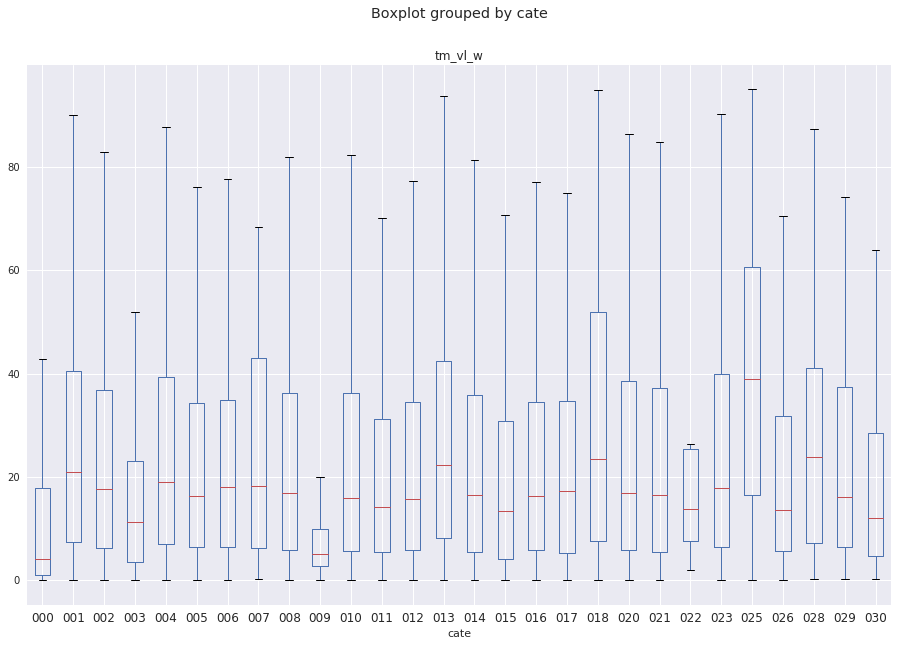

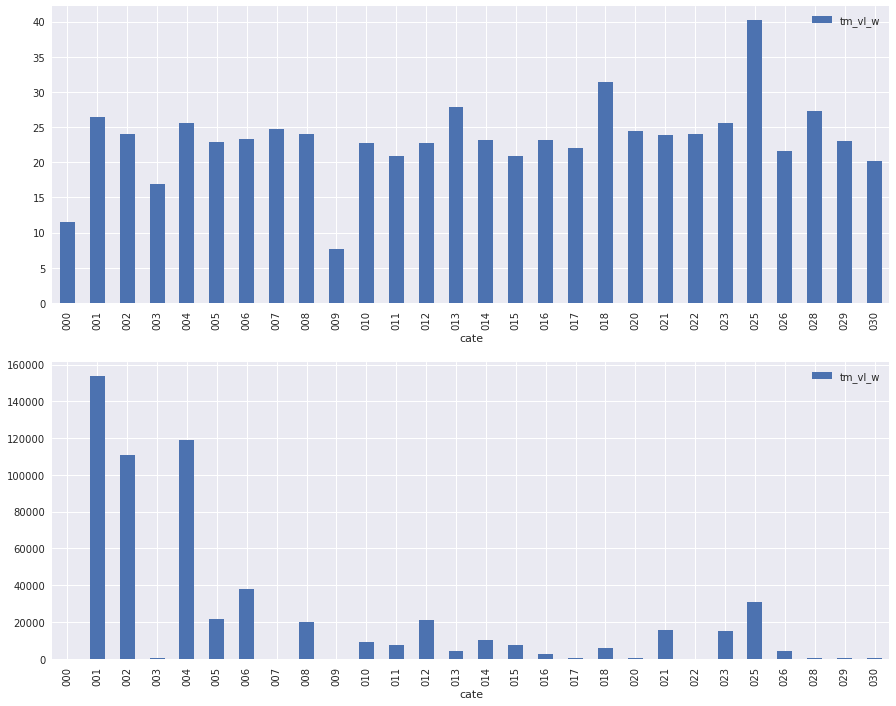

      tm_vl_w
cate         
001    153650
002    110560
003       235
004    119251
005     21757
006     37868
008     19927
010      8891
011      7506
012     20819
013      4158
014     10127
015      7363
016      2595
017       302
018      5769
020       354
021     15551
023     15030
025     31096
026      4271
028       181
029       126
030       246


In [131]:
# 分类字符阅读时长
dc_tm_vl_w = dc[['cate','tm_vl_w']][(dc['tm_vl_w']<dc['tm_vl_w'].quantile(0.95))&(dc['cate'].str.startswith('032')==False)]
dc_tm_vl_w.boxplot(column='tm_vl_w', by='cate', figsize=(15,10))
plt.show()

# 结论：除幽默（025）、食物（018）这两个类目平均字符阅读时长偏高外，其它分类差不多。不能用平均字符阅读时长来度量分类内容的深度，更多可能是阅读理解时间成本
# 说明：000、003、009内容较少且分类不准，可以忽略
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,12))
dc_tm_vl_w_mean = dc_tm_vl_w.groupby('cate').mean()
dc_tm_vl_w_mean.plot(kind='bar', ax=axes[0])
dc_tm_vl_w_cnt = dc_tm_vl_w.groupby('cate').count()
dc_tm_vl_w_cnt.plot(kind='bar', ax=axes[1])
plt.show()

